# Forecasting Data Kunjungan Wisatawan di Bandara International Lombok 

Pada Kasus ini saya melakukan ekpslorasi terhadap data kunjungan wisatawan mancanegara yang datang atau masuk ke pintu Bandara 
Internasional Lombok. Beberapa tahap atau proses yang saya lakukan yakni import data, persiapan data, eksplorasi data-data dengan melakukan 
berbagai uji stationeritas, uji autokerlasi, dan berbagai visualisasi lainnya untuk mengetahui pola ataupun distribusi dari wisatawan yang datang
ke bandara tersebut. Selain itu saya juga menerapkan pemodelan forecasting dengan menggunakan model prediksi ARIMA dan SARIMA sebagai eksplorasi 
lebih lanjut untuk mengetahui bagaimana hasil model prediksi jika diterapkan pada data yang saya miliki ini. Berikut beberapa proses dan langkah yang
saya lakukan : 

## 1. Import Library

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

## 2. Preprocessing data

In [2]:
# Baca file CSV ke dalam DataFrame
df1 = pd.read_csv('Jumlah Kunjungan Wisatawan Mancanegara  2014.csv')

df1

,Pintu Masuk,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Jumlah Kunjungan Wisatawan Mancanegara per bul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
3,Soekarno-Hatta,187123,180362,194720,180787,184534,208624,169135,218903,174169,177274,180208,190598
4,Ngurah Rai,278685,269367,268418,277925,285965,329654,358907,336628,352017,339200,293858,341111
5,Kualanamu,19029,17780,18493,15956,19781,19376,16579,16901,17792,20946,22848,29243
6,Batam,119054,97445,122019,111929,115323,140218,101996,111455,113090,126169,123505,171907
7,Sam Ratulangi,1694,1079,1340,1079,1365,1487,1652,1854,1652,1642,943,1492
8,Juanda,16870,16476,18776,19145,20299,18685,16174,18239,17124,17997,18324,19084
9,Entikong,1535,1609,1699,1430,1785,1703,2488,1568,1445,1731,1936,3535


In [3]:
# Setel baris ke-2 sebagai header
df1.columns = df1.iloc[2]

# Hapus baris-baris awal yang tidak dibutuhkan (header lama)
df1 = df1[3:]

# Ganti nama kolom pertama dengan 'Pintu Masuk'
df1.columns.values[0] = 'Pintu Masuk'

# Filter baris di mana 'Pintu Masuk' adalah 'Bandara Internasional Lombok'
df1f = df1[df1['Pintu Masuk'] == 'Bandara Internasional Lombok']

df1f


2,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
14,Bandara Internasional Lombok,5105,4862,5987,5413,6499,6071,6582,7259,6532,5438,3748,6385


In [4]:
# Ganti nama kolom dengan nama bulan Januari-Desember
df1f.columns = ['Pintu Masuk', 'Januari', 'Februari', 'Maret', 'April', 'Mei', 
              'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

df1f

,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
14,Bandara Internasional Lombok,5105,4862,5987,5413,6499,6071,6582,7259,6532,5438,3748,6385


In [5]:
import pandas as pd

# Baca file CSV ke dalam DataFrame
df2 = pd.read_csv('Jumlah Kunjungan Wisatawan Mancanegara 2015.csv')

df2

,Pintu Masuk,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Jumlah Kunjungan Wisatawan Mancanegara per bul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
3,Soekarno-Hatta,165746,170741,203019,159873,189307,174319,175347,252914,212706,197487,216517,186299
4,Ngurah Rai,288755,333072,294758,309888,287141,357712,381890,298638,379397,366759,262180,363780
5,Kualanamu,17286,18082,17491,15167,17558,15479,15879,16490,14857,14160,16203,19166
6,Batam,114478,119642,124019,125816,148920,132569,109931,134540,117089,123750,124983,170081
7,Sam Ratulangi,2248,3374,1171,1044,1011,1007,2089,2247,1410,1297,1428,1139
8,Juanda,15366,14003,16338,16063,17355,15004,17134,18311,18167,15798,20449,16863
9,Entikong,1265,1873,2440,1491,2424,1662,2573,1710,1693,1455,2513,3753


In [6]:
# Setel baris ke-2 sebagai header
df2.columns = df2.iloc[2]

# Hapus baris-baris awal yang tidak dibutuhkan (header lama)
df2 = df2[3:]

# Ganti nama kolom pertama dengan 'Pintu Masuk'
df2.columns.values[0] = 'Pintu Masuk'

# Filter baris di mana 'Pintu Masuk' adalah 'Bandara Internasional Lombok'
df2f = df2[df2['Pintu Masuk'] == 'Bandara Internasional Lombok']

df2f

2,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
14,Bandara Internasional Lombok,2793,4348,6004,5725,5713,4410,5316,8089,7440,7419,4477,8483


In [7]:
import pandas as pd

# Baca file CSV ke dalam DataFrame
df3 = pd.read_csv('Jumlah Kunjungan Wisatawan Mancanegara 2016.csv')

df3

,Pintu Masuk,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Jumlah Kunjungan Wisatawan Mancanegara per bul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
3,Soekarno-Hatta,153503,164317,202669,188369,187545,150956,217452,270496,229964,237914,219246,193629
4,Ngurah Rai,343663,367024,354778,367370,394443,405686,482201,437929,442304,423140,396150,437946
5,Kualanamu,10080,14851,15730,13280,15515,12746,17999,15890,19221,21300,21083,26252
6,Batam,108888,120351,125324,125573,132410,121253,103647,99724,115052,114020,106953,159277
7,Sam Ratulangi,625,1535,1297,1427,1018,1295,7677,7904,5965,3791,4270,3820
8,Juanda,11674,14955,17894,18186,18386,14755,20424,19029,19907,20819,23126,21415
9,Entikong,1050,2307,1937,1426,2046,1515,2360,2319,2148,1494,1610,3433


In [8]:
# Setel baris ke-2 sebagai header
df3.columns = df3.iloc[2]

# Hapus baris-baris awal yang tidak dibutuhkan (header lama)
df3 = df3[3:]

# Ganti nama kolom pertama dengan 'Pintu Masuk'
df3.columns.values[0] = 'Pintu Masuk'

# Filter baris di mana 'Pintu Masuk' adalah 'Bandara Internasional Lombok'
df3f = df3[df3['Pintu Masuk'] == 'Bandara Internasional Lombok']

df3f

2,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
14,Bandara Internasional Lombok,5162,6184,7356,5407,7634,4452,9653,9127,8756,9500,7813,9694


In [9]:
df = pd.concat([df1f, df2f, df3f], ignore_index=True)
df

,Pintu Masuk,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,Bandara Internasional Lombok,5105,4862,5987,5413,6499,6071,6582,7259,6532,5438,3748,6385
1,Bandara Internasional Lombok,2793,4348,6004,5725,5713,4410,5316,8089,7440,7419,4477,8483
2,Bandara Internasional Lombok,5162,6184,7356,5407,7634,4452,9653,9127,8756,9500,7813,9694


In [10]:
# Tambahkan kolom Tahun
df['Tahun'] = [2014, 2015, 2016]

# Atur kolom 'Tahun' sebagai kolom pertama
df = df[['Tahun'] + [col for col in df.columns if col != 'Tahun']]

# Hapus kolom 'Pintu Masuk'
df = df.drop(columns=['Pintu Masuk'])

df

,Tahun,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,2014,5105,4862,5987,5413,6499,6071,6582,7259,6532,5438,3748,6385
1,2015,2793,4348,6004,5725,5713,4410,5316,8089,7440,7419,4477,8483
2,2016,5162,6184,7356,5407,7634,4452,9653,9127,8756,9500,7813,9694


In [11]:
df.set_index('Tahun', inplace=True)

# Transpose DataFrame dan reset index
df = df.T.reset_index()

# Rename columns to the desired format
df.columns = ['Bulan', '2014', '2015', '2016']

df

,Bulan,2014,2015,2016
0,Januari,5105,2793,5162
1,Februari,4862,4348,6184
2,Maret,5987,6004,7356
3,April,5413,5725,5407
4,Mei,6499,5713,7634
5,Juni,6071,4410,4452
6,Juli,6582,5316,9653
7,Agustus,7259,8089,9127
8,September,6532,7440,8756
9,Oktober,5438,7419,9500


In [12]:
data = df.copy()

## 3. Eksplorasi Data

### a. Uji Stasioneritas Data

In [13]:
data.set_index('Bulan', inplace=True)
# Flatten the DataFrame to convert it into a time series
time_series_data = data.stack()

# ADF Test
result = adfuller(time_series_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
    
# Interpretasi hasil uji
if result[1] <= 0.05:
    print("Hasil uji menunjukkan bahwa data tidak memiliki pola tren/musim dan stasioner (reject the null hypothesis)")
else:
    print("Hasil uji menunjukkan bahwa data memiliki pola tren/musim dan tidak stasioner (fail to reject the null hypothesis)")

ADF Statistic: -1.8131942499299958
p-value: 0.37393106923044594
Hasil uji menunjukkan bahwa data memiliki pola tren/musim dan tidak stasioner (fail to reject the null hypothesis)


Berdasarkan hasil uji Augmented Dickey-Fuller (ADF) yang diperoleh, dengan nilai ADF Statistic sebesar -1.813 dan p-value sebesar 0.3739, dapat disimpulkan bahwa data kunjungan wisatawan di Bandara Internasional Lombok untuk periode 2014-2016 menunjukkan adanya pola tren atau musiman yang signifikan dan tidak stasioner. Hal ini berarti bahwa data memiliki kecenderungan untuk berubah seiring waktu, dan tidak tetap atau konsisten pada rata-rata atau variansi tertentu. Dengan p-value yang lebih besar dari tingkat signifikansi umum (misalnya 0.05), kita gagal untuk menolak hipotesis nol, yang mengindikasikan bahwa data ini tidak stasioner. Ketidakstasioneran data ini mengindikasikan bahwa data mungkin bersifat musiman dan memiliki tren tertentu sehingga hasil ini akan saya lakukan untuk referensi sebelum pada tahap forecasting atau pemodelan.

### b. Pola Trend Data

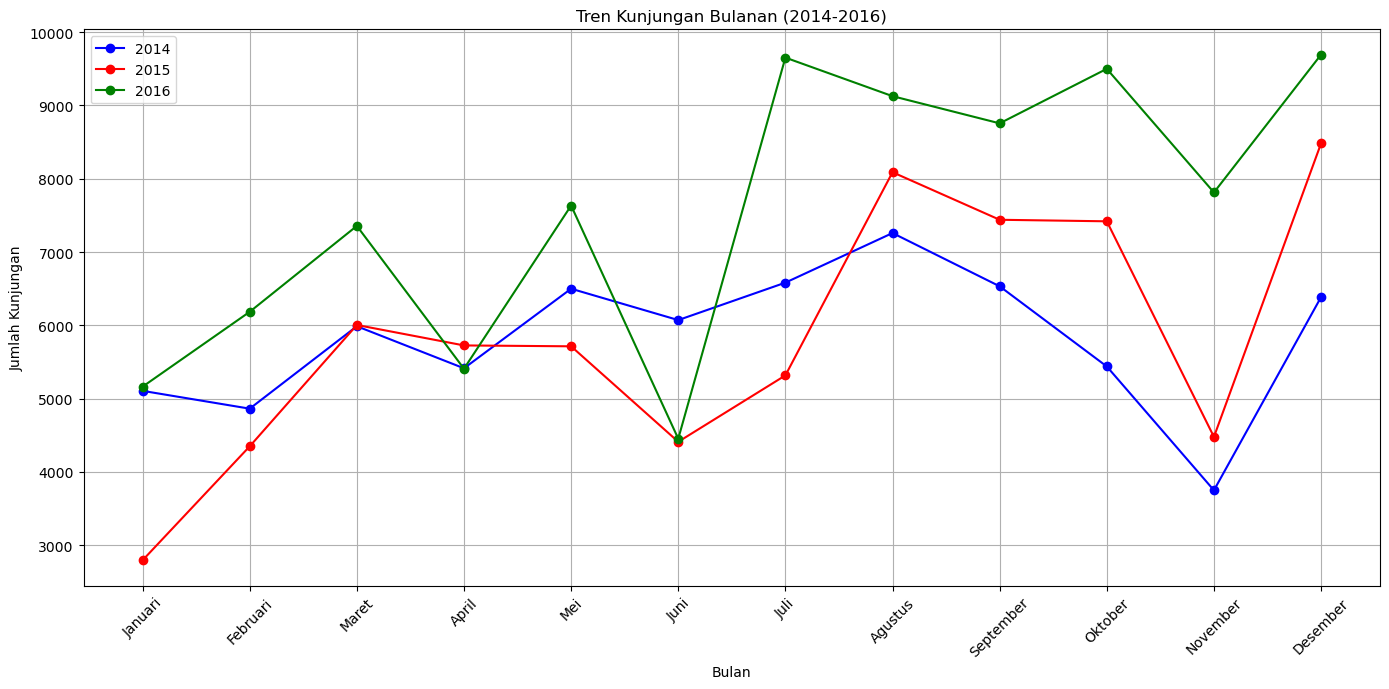

In [14]:
# Data
data = {
    "Bulan": [
        "Januari", "Februari", "Maret", "April", "Mei", "Juni", 
        "Juli", "Agustus", "September", "Oktober", "November", "Desember"
    ],
    "2014": [5105, 4862, 5987, 5413, 6499, 6071, 6582, 7259, 6532, 5438, 3748, 6385],
    "2015": [2793, 4348, 6004, 5725, 5713, 4410, 5316, 8089, 7440, 7419, 4477, 8483],
    "2016": [5162, 6184, 7356, 5407, 7634, 4452, 9653, 9127, 8756, 9500, 7813, 9694]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(df['Bulan'], df['2014'], marker='o', linestyle='-', color='b', label='2014')
plt.plot(df['Bulan'], df['2015'], marker='o', linestyle='-', color='r', label='2015')
plt.plot(df['Bulan'], df['2016'], marker='o', linestyle='-', color='g', label='2016')

plt.title('Tren Kunjungan Bulanan (2014-2016)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kunjungan')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


Dari hasil grafik visulisasi Tren Kunjungan Bulanan wisatawan yang berkunjung atau datang ke Bandara Udara Internasional Lombok selama periode tahun 2014-2016 menunjukkan bahwa dari grafik tahun 2014 (warna biru), 2015 (merah), dan 2016 (hijau) terlihat pola tren yang konsisten. Terlihat bahwa kunjungan wisatawan cenderung meningkat dari bulan Januari dan mencapai puncaknya pada bulan Maret. Setelah puncak tersebut, terjadi penurunan jumlah kunjungan pada bulan April, yang mungkin disebabkan oleh berakhirnya periode liburan atau kurangnya acara menarik. Namun, setelah penurunan ini, terdapat lonjakan kembali pada bulan Mei, menunjukkan bahwa kunjungan wisatawan kembali meningkat. Pola ini berulang pada bulan-bulan lainnya, mengindikasikan adanya pola musiman yang konsisten di setiap tahun. Secara keseluruhan, meskipun terdapat variasi dalam jumlah kunjungan antar tahun, pola musiman yang serupa mencerminkan adanya faktor-faktor musiman yang mempengaruhi kunjungan wisatawan secara teratur.

### c. Uji Autokorelasi (Grafik ACF)

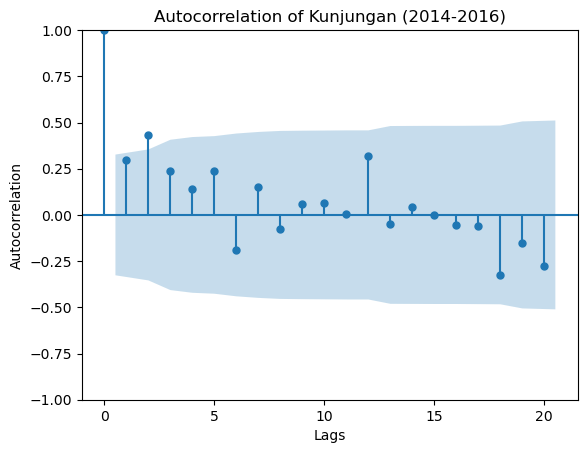

In [15]:
# Menggabungkan data dari 3 tahun menjadi satu seri untuk uji autokorelasi
kunjungan_series = pd.concat([df['2014'], df['2015'], df['2016']], ignore_index=True)

# Plot Autocorrelation
plot_acf(kunjungan_series, lags=20)
plt.title('Autocorrelation of Kunjungan (2014-2016)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

Hasil dari grafik autocorrelation untuk data kunjungan wisatawan di Bandara Internasional Lombok menunjukkan beberapa pola signifikan yang memberikan wawasan tentang struktur data. Pada lag 1, nilai autocorrelation mendekati puncak, menandakan adanya korelasi positif yang kuat antara nilai saat ini dan nilai satu periode sebelumnya. Ini berarti bahwa jumlah kunjungan bulan ini cenderung serupa dengan jumlah kunjungan bulan lalu. Selain itu, nilai pada lag 2 melewati garis batas, menunjukkan korelasi yang signifikan secara statistik antara nilai saat ini dan nilai dua periode sebelumnya. Hal ini mengindikasikan adanya pola yang mempengaruhi kunjungan setiap dua bulan, yang bisa merujuk pada pola musiman atau faktor-faktor lain yang berulang setiap dua bulan. Selanjutnya, nilai autocorrelation pada lag-lag lainnya cenderung berdekatan dan tinggi, menunjukkan bahwa ada korelasi yang stabil di antara nilai-nilai pada periode-periode tersebut. Pola ini menyarankan bahwa data mungkin memiliki struktur musiman atau jangka panjang yang lebih kompleks. Secara keseluruhan, analisis ini mengindikasikan adanya ketergantungan jangka pendek dan potensi pola musiman yang mempengaruhi kunjungan wisatawan, yang bisa menjadi dasar untuk pemilihan model peramalan yang tepat, seperti SARIMA, untuk menangkap dan memprediksi pola-pola ini secara akurat.

### d. Uji Autokerlasi dengan Durbin Watson

In [16]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
# Flattening the data into a single series
kunjungan_series = pd.concat([df['2014'], df['2015'], df['2016']], ignore_index=True)

# Create a simple linear regression model
X = np.arange(len(kunjungan_series))  # independent variable (time index)
X = sm.add_constant(X)  # adding a constant (intercept)
model = sm.OLS(kunjungan_series, X).fit()

# Get the residuals from the model
residuals = model.resid

# Perform Durbin-Watson test
dw_stat = durbin_watson(residuals)

print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 1.8407704182019264


Hasil dari uji Durbin-Watson, dengan statistik sebesar 1.841, memberikan wawasan tambahan tentang adanya autokorelasi dalam residual model regresi yang digunakan. Statistik Durbin-Watson mengukur autokorelasi residual pada model regresi; nilai yang dekat dengan 2 menunjukkan tidak adanya autokorelasi, sementara nilai yang mendekati 0 atau 4 menunjukkan adanya autokorelasi positif atau negatif, masing-masing. Dalam hal ini, nilai 1.841 berada relatif dekat dengan 2, yang mengindikasikan bahwa tidak ada autokorelasi signifikan dalam residual model. Ini berarti bahwa residual tidak menunjukkan pola sistematis dan bahwa model yang digunakan tidak terpengaruh oleh autokorelasi yang dapat mempengaruhi akurasi prediksi. Dengan kata lain, hasil ini menyarankan bahwa model yang diterapkan telah menangkap pola dalam data dengan baik dan bahwa asumsi independensi residual dalam analisis regresi mungkin terpenuhi. Namun, nilai ini masih sedikit lebih rendah dari 2, yang dapat menunjukkan adanya sedikit autokorelasi, sehingga mungkin masih diperlukan penyesuaian atau pemeriksaan lebih lanjut untuk memastikan keakuratan dan kinerja model.

### e. Grafik Time Series dan Uji ADF

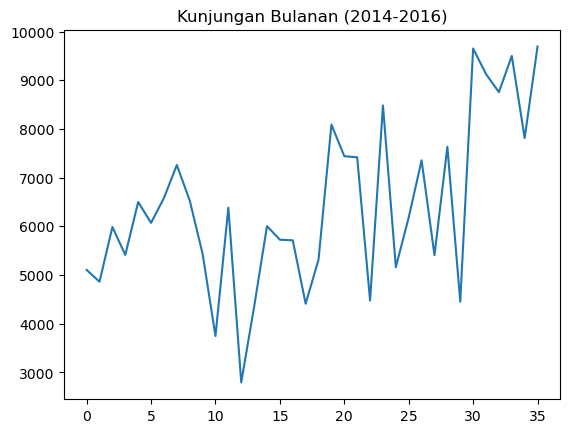

ADF Statistic: -1.8074620361671485
p-value: 0.37676334366073244


In [17]:
kunjungan_series = pd.concat([df['2014'], df['2015'], df['2016']], ignore_index=True)

# Plotting the data
plt.plot(kunjungan_series)
plt.title('Kunjungan Bulanan (2014-2016)')
plt.show()

# Uji Stasioneritas dengan ADF (Augmented Dickey-Fuller Test)
result = adfuller(kunjungan_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Pengambilan :
Jika p-value lebih besar dari tingkat signifikansi yang biasa digunakan (misalnya 0.05), Anda tidak dapat menolak hipotesis nol. Ini berarti data Anda mungkin tidak stasioner.
Jika p-value lebih kecil dari tingkat signifikansi (misalnya 0.05), Anda dapat menolak hipotesis nol dan menyimpulkan bahwa data Anda stasioner.

Hasil:
Nilai p-value 0.377 (Kurang dari 0,05), ini menunjukkan bahwa tidak dapat menolak hipotesis nol, jadi data ini tidak stasioner. 

# 4. Modeling Forecasting

In [18]:
df

,Bulan,2014,2015,2016
0,Januari,5105,2793,5162
1,Februari,4862,4348,6184
2,Maret,5987,6004,7356
3,April,5413,5725,5407
4,Mei,6499,5713,7634
5,Juni,6071,4410,4452
6,Juli,6582,5316,9653
7,Agustus,7259,8089,9127
8,September,6532,7440,8756
9,Oktober,5438,7419,9500


In [21]:
# Mengubah format data menjadi format yang diinginkan
df_melted = pd.melt(df, id_vars=["Bulan"], value_vars=["2014", "2015", "2016"], 
                    var_name="Tahun", value_name="Kunjungan")

# Menggabungkan Tahun dan Bulan
df_melted["Tahun_Bulan"] = df_melted["Tahun"] + "_" + df_melted["Bulan"]

# Memilih kolom yang diinginkan
df_final = df_melted[["Tahun_Bulan", "Kunjungan"]]

df_final

,Tahun_Bulan,Kunjungan
0,2014_Januari,5105
1,2014_Februari,4862
2,2014_Maret,5987
3,2014_April,5413
4,2014_Mei,6499
5,2014_Juni,6071
6,2014_Juli,6582
7,2014_Agustus,7259
8,2014_September,6532
9,2014_Oktober,5438


### Model ARIMA dan SARIMA

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14572\1004815120.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Kunjungan'] += 0.01
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14572\1004815120.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Kunjungan'] += 0.01
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting auto

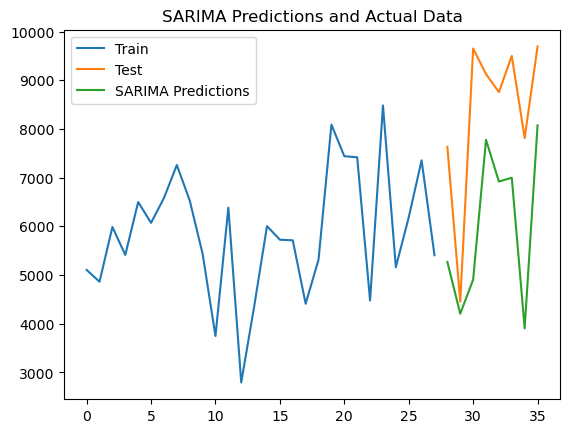

SARIMA Model Evaluation:
Mean Absolute Error (MAE): 2322.21
Mean Absolute Percentage Error (MAPE): 26.82%


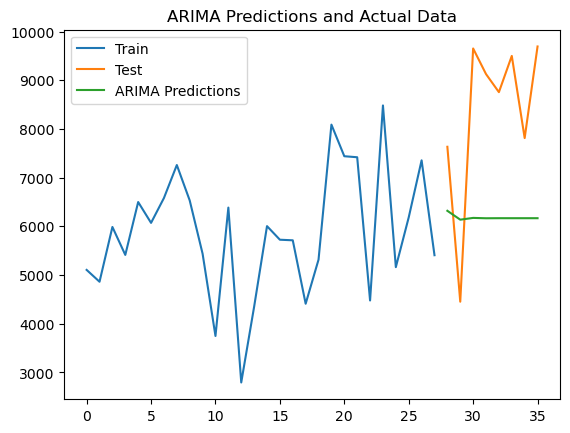

ARIMA Model Evaluation:
Mean Absolute Error (MAE): 2566.90
Mean Absolute Percentage Error (MAPE): 30.71%


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Fungsi untuk membuat dan mengevaluasi model SARIMA
def sarima_model(train, test):
    
    # Tambahkan konstanta ke seluruh data
    train['Kunjungan'] += 0.01
    test['Kunjungan'] += 0.01
    
    order = (1, 1, 1)  # p, d, q
    seasonal_order = (1, 1, 1, 12)  # P, D, Q, s
    model = SARIMAX(train['Kunjungan'], order=order, seasonal_order=seasonal_order, enforce_invertibility=False)
    results = model.fit()
    
    # Melakukan prediksi
    start_date = test.index[0]
    end_date = test.index[-1]
    predictions = results.predict(start=start_date, end=end_date, dynamic=False)
    
    # Mengevaluasi prediksi dengan metrik MAE dan MAPE
    mae = mean_absolute_error(test['Kunjungan'], predictions)
    mape = mean_absolute_percentage_error(test['Kunjungan'], predictions)
    
    # Visualisasi hasil prediksi
    plt.plot(train.index, train['Kunjungan'], label='Train')
    plt.plot(test.index, test['Kunjungan'], label='Test')
    plt.plot(predictions.index, predictions, label='SARIMA Predictions')
    plt.legend()
    plt.title('SARIMA Predictions and Actual Data')
    plt.show()
    
    print(f'SARIMA Model Evaluation:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    

# Fungsi untuk membuat dan mengevaluasi model ARIMA
def arima_model(train, test):
    order = (1, 1, 1)  # p, d, q
    model = ARIMA(train['Kunjungan'], order=order)
    results = model.fit()
    
    # Melakukan prediksi
    start_date = test.index[0]
    end_date = test.index[-1]
    predictions = results.predict(start=start_date, end=end_date, dynamic=False)
    
    # Mengevaluasi prediksi dengan metrik MAE dan MAPE
    mae = mean_absolute_error(test['Kunjungan'], predictions)
    mape = mean_absolute_percentage_error(test['Kunjungan'], predictions)
    
    # Visualisasi hasil prediksi
    plt.plot(train.index, train['Kunjungan'], label='Train')
    plt.plot(test.index, test['Kunjungan'], label='Test')
    plt.plot(predictions.index, predictions, label='ARIMA Predictions')
    plt.legend()
    plt.title('ARIMA Predictions and Actual Data')
    plt.show()
    
    print(f'ARIMA Model Evaluation:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(df_final) * 0.8)
train, test = df_final[:train_size], df_final[train_size:]

# Memanggil fungsi untuk membuat dan mengevaluasi model SARIMA
sarima_model(train, test)

# Memanggil fungsi untuk membuat dan mengevaluasi model ARIMA
arima_model(train, test)


Model SARIMA menunjukkan Mean Absolute Error (MAE) sebesar 2322.21 dan Mean Absolute Percentage Error (MAPE) sebesar 26.82%. MAE mengukur rata-rata selisih absolut antara nilai aktual dan nilai yang diprediksi oleh model, sehingga nilai ini menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 2322 kunjungan. MAPE, yang dinyatakan dalam persen, mengindikasikan bahwa rata-rata kesalahan prediksi adalah sekitar 26.82% dari nilai aktual. Dengan kata lain, prediksi SARIMA cenderung menyimpang sekitar 26.82% dari nilai kunjungan yang sebenarnya, yang memberikan gambaran bahwa model ini cukup baik dalam menangkap pola musiman dan tren dalam data.

Sebaliknya, model ARIMA menunjukkan Mean Absolute Error (MAE) sebesar 2566.90 dan Mean Absolute Percentage Error (MAPE) sebesar 30.71%. MAE ini berarti bahwa rata-rata kesalahan prediksi adalah sekitar 2567 kunjungan. MAPE menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 30.71% dari nilai aktual. Dalam hal ini, model ARIMA memiliki tingkat kesalahan yang lebih tinggi dibandingkan dengan model SARIMA, baik dalam hal nilai absolut maupun persentase. Ini mengindikasikan bahwa ARIMA mungkin kurang efektif dalam menangkap pola musiman dan tren yang ada dalam data jika dibandingkan dengan SARIMA.

### KESIMPULAN

Dari hasil pemodelan forecasting menggunakan ARIMA dan SARIMA, tampak bahwa kedua model masih menunjukkan nilai akurasi yang relatif rendah. Meskipun SARIMA memberikan hasil yang lebih baik dibandingkan ARIMA dalam hal MAE dan MAPE, kesalahan prediksi yang signifikan masih terlihat pada kedua model. Hal ini menunjukkan bahwa meskipun model SARIMA dapat menangkap pola musiman dengan lebih baik, akurasi prediksi tetap terbatas. Salah satu faktor utama yang berkontribusi terhadap hasil ini adalah jumlah data historikal yang terbatas. Data yang digunakan mencakup periode dari tahun 2014 hingga 2016, yang mungkin tidak cukup untuk menangkap seluruh variasi musiman dan tren jangka panjang dalam kunjungan wisatawan. 

Dalam forecasting, terutama untuk data yang memiliki komponen musiman dan tren yang kompleks, variasi historikal yang lebih banyak sangat penting. Data yang lebih panjang memungkinkan model untuk belajar dari pola yang lebih lengkap dan lebih variatif, sehingga meningkatkan kemampuan model dalam memprediksi masa depan dengan lebih akurat. Oleh karena itu, pengumpulan data tambahan yang mencakup periode yang lebih panjang dan mungkin melibatkan berbagai faktor eksternal seperti peristiwa khusus, perubahan kebijakan, atau faktor ekonomi yang mempengaruhi kunjungan wisatawan dapat membantu meningkatkan akurasi prediksi. Dengan memperluas dataset, model dapat lebih baik menangkap dinamika musiman dan tren yang ada, sehingga menghasilkan prediksi yang lebih dapat diandalkan dan informatif.

# 5. Prediksi Tahun Berikutnya (2017)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fungsi untuk membuat dan mengevaluasi model SARIMA
def sarima_model(train, test):
    # Tambahkan konstanta ke seluruh data
    train['Kunjungan'] += 0.01
    test['Kunjungan'] += 0.01
    
    order = (1, 0, 2)  # p, d, q
    seasonal_order = (1, 0, 1, 12)  # P, D, Q, s
    model = SARIMAX(train['Kunjungan'], order=order, seasonal_order=seasonal_order, enforce_invertibility=False)
    results = model.fit()
    
    # Melakukan prediksi
    start_date = test.index[0]
    end_date = test.index[-1]
    predictions = results.predict(start=start_date, end=end_date, dynamic=False)


    # Prediksi untuk tahun 2017 (12 bulan ke depan)
    forecast_start_date = pd.to_datetime('2017-01-01')
    forecast_end_date = pd.to_datetime('2017-12-01')
    forecast = results.get_forecast(steps=12)  # Menghapus argumen start dan end

    # Menggunakan frekuensi 'M' untuk membuat forecast_index
    forecast_index = pd.date_range(start=forecast_start_date, periods=12, freq='M')

    # Menampilkan hasil prediksi
    forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean})
    forecast_df.index = forecast_index
    print(forecast_df)

    print(f'SARIMA Model Evaluation:')

# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(df_final) * 0.79)
train, test = df_final[:train_size], df_final[train_size:]

# Memanggil fungsi untuk membuat dan mengevaluasi model SARIMA
sarima_model(train, test)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14572\1422711070.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Kunjungan'] += 0.01
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14572\1422711070.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Kunjungan'] += 0.01
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

               Forecast
2017-01-31  5800.400981
2017-02-28  5284.702453
2017-03-31  5768.500715
2017-04-30  7336.187373
2017-05-31  7020.118700
2017-06-30  7108.195267
2017-07-31  5531.947128
2017-08-31  7646.177045
2017-09-30  6037.066462
2017-10-31  6474.050295
2017-11-30  7011.602968
2017-12-31  5878.364623
SARIMA Model Evaluation:


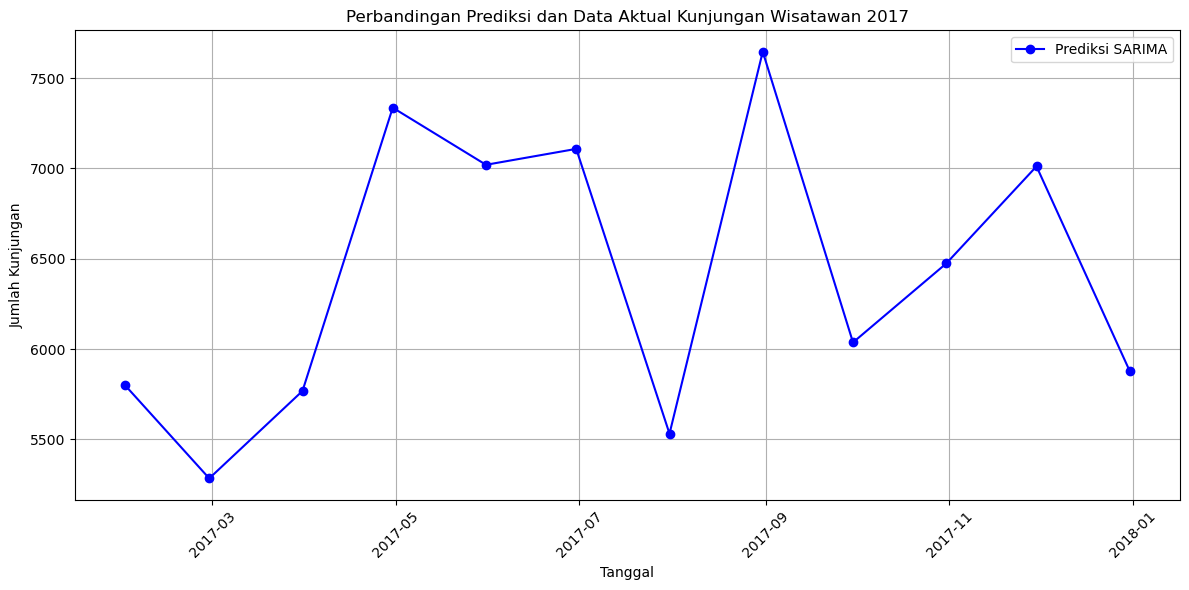

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Data prediksi untuk tahun 2017 dari model SARIMA
forecast_data = {
    'Tanggal': pd.date_range(start='2017-01-01', end='2017-12-31', freq='M'),
    'Prediksi': [5800.40, 5284.70, 5768.50, 7336.19, 7020.12, 7108.20, 
                 5531.95, 7646.18, 6037.07, 6474.05, 7011.60, 5878.36]
}
df_forecast = pd.DataFrame(forecast_data)

# Data aktual untuk tahun 2017 (misalnya, data ini perlu disiapkan atau diimpor)
# Misalkan data aktual sudah tersedia dalam bentuk DataFrame df_actual
# df_actual = pd.read_csv('data_aktual_2017.csv')  # atau data aktual lainnya

# Untuk visualisasi, gabungkan data aktual dan prediksi (gantilah df_actual dengan data aktual yang sebenarnya)
plt.figure(figsize=(12, 6))

# Plot data prediksi
plt.plot(df_forecast['Tanggal'], df_forecast['Prediksi'], label='Prediksi SARIMA', color='blue', marker='o')

# Plot data aktual (asumsi df_actual memiliki kolom 'Tanggal' dan 'Kunjungan')
# plt.plot(df_actual['Tanggal'], df_actual['Kunjungan'], label='Data Aktual', color='red', marker='x')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kunjungan')
plt.title('Perbandingan Prediksi dan Data Aktual Kunjungan Wisatawan 2017')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Hasil prediksi kunjungan wisatawan untuk tahun 2017 menggunakan model SARIMA menunjukkan fluktuasi yang signifikan dalam jumlah kunjungan sepanjang tahun. Di awal tahun, pada bulan Januari dan Februari, jumlah kunjungan diperkirakan mencapai sekitar 5800 hingga 5300, yang relatif moderat. Namun, prediksi menunjukkan lonjakan yang cukup besar pada bulan April, dengan angka kunjungan mencapai 7336, dan puncaknya terjadi pada bulan Agustus dengan 7646 kunjungan. Lonjakan ini mungkin mencerminkan periode musim liburan atau acara khusus yang menarik lebih banyak wisatawan. Setelah Agustus, prediksi menunjukkan penurunan kembali, dengan angka kunjungan sekitar 5500 pada bulan Juli, 6037 pada bulan September, dan 5878 pada bulan Desember. Fluktuasi ini mengindikasikan bahwa meskipun ada periode puncak yang tinggi, tahun 2017 juga mengalami variasi dalam jumlah kunjungan yang mungkin disebabkan oleh faktor musiman atau kondisi spesifik dalam tahun tersebut. Grafik ini membantu memahami bagaimana model SARIMA memproyeksikan kunjungan dan memberikan gambaran tentang pola musiman yang mungkin mempengaruhi aliran wisatawan ke bandara.

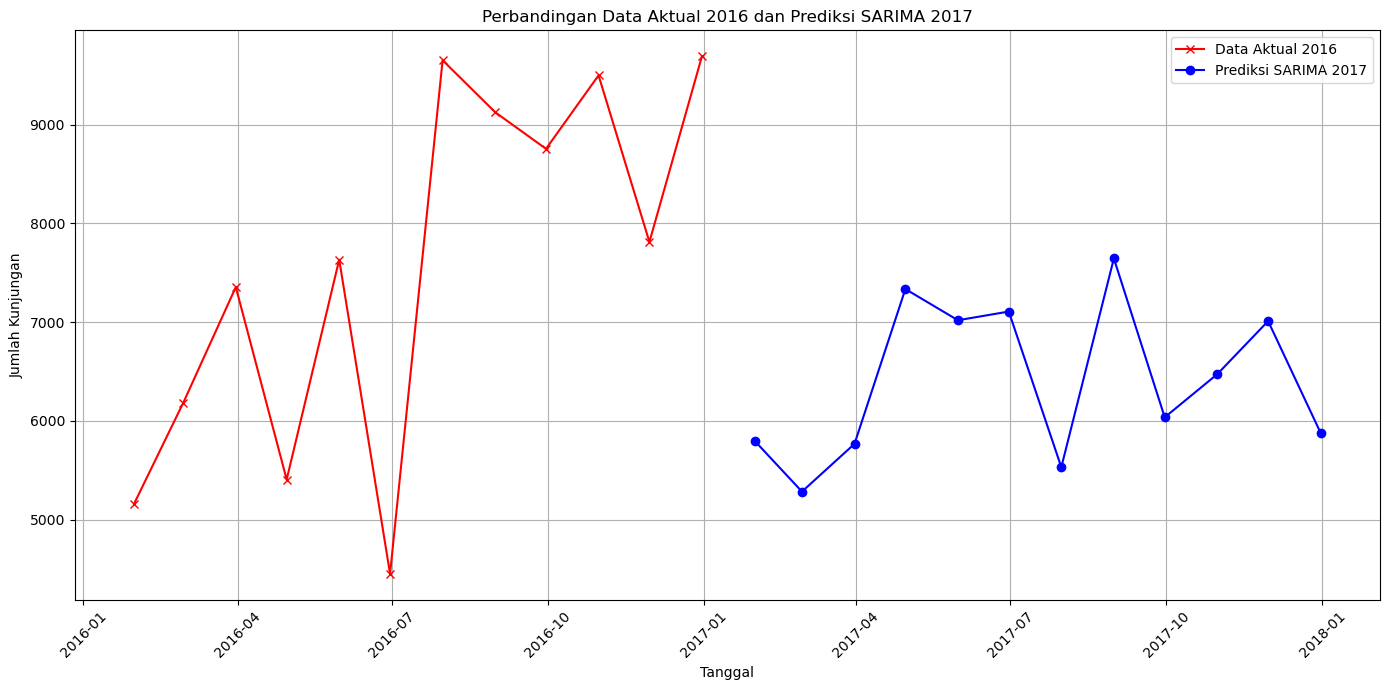

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Data aktual untuk tahun 2016
data_2016 = [5162, 6184, 7356, 5407, 7634, 4452, 9653, 9127, 8756, 9500, 7813, 9694]
tanggal_2016 = pd.date_range(start='2016-01-01', end='2016-12-31', freq='M')

# Data prediksi untuk tahun 2017
forecast_data = {
    'Tanggal': pd.date_range(start='2017-01-01', end='2017-12-31', freq='M'),
    'Prediksi': [5800.40, 5284.70, 5768.50, 7336.19, 7020.12, 7108.20, 
                 5531.95, 7646.18, 6037.07, 6474.05, 7011.60, 5878.36]
}
df_forecast = pd.DataFrame(forecast_data)

# Plot data aktual dan prediksi
plt.figure(figsize=(14, 7))

# Plot data aktual tahun 2016
plt.plot(tanggal_2016, data_2016, label='Data Aktual 2016', color='red', marker='x')

# Plot data prediksi tahun 2017
plt.plot(df_forecast['Tanggal'], df_forecast['Prediksi'], label='Prediksi SARIMA 2017', color='blue', marker='o')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kunjungan')
plt.title('Perbandingan Data Aktual 2016 dan Prediksi SARIMA 2017')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Hasil prediksi kunjungan wisatawan untuk tahun 2017, yang diperoleh dari model SARIMA, menunjukkan dinamika yang menarik ketika dibandingkan dengan data aktual dari tahun 2016. Tahun 2016 memperlihatkan variasi kunjungan yang cukup besar, dengan angka tertinggi mencapai 9694 pada bulan Desember dan angka terendah pada bulan Juni dengan 4452 kunjungan. 

Dalam prediksi tahun 2017, model SARIMA memperkirakan beberapa puncak dan penurunan signifikan yang mencerminkan pola musiman yang mirip dengan tahun sebelumnya. Prediksi menunjukkan angka kunjungan yang cukup tinggi pada bulan April, dengan 7336 kunjungan, dan mencapai puncaknya pada bulan Agustus dengan 7646 kunjungan, mencerminkan pola musiman yang serupa dengan tahun 2016. Namun, ada beberapa perbedaan yang menarik antara data aktual 2016 dan prediksi 2017. Misalnya, prediksi tahun 2017 tidak menunjukkan puncak yang setinggi angka kunjungan tertinggi di bulan Desember 2016, yang mencapai 9694, sementara prediksi untuk bulan Desember 2017 adalah 5878 kunjungan. 

Selain itu, model SARIMA menunjukkan penurunan jumlah kunjungan di bulan-bulan setelah Agustus, yang cukup konsisten dengan tren penurunan pada tahun 2016, meskipun angka-angka prediksi sedikit lebih rendah dibandingkan dengan angka aktual tahun sebelumnya. Keseluruhan, grafik perbandingan antara prediksi tahun 2017 dan data tahun 2016 menunjukkan bahwa meskipun model dapat menangkap pola musiman dan tren utama, ada beberapa perbedaan dalam magnitudo puncak dan penurunan kunjungan. Hal ini menyoroti pentingnya data historis yang lebih panjang dan faktor eksternal lainnya dalam meningkatkan akurasi prediksi untuk memahami tren kunjungan wisatawan secara lebih mendalam.